In [12]:
import re
from difflib import SequenceMatcher
from PIL import Image
import pytesseract
import cv2
import numpy as np
import os

In [13]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

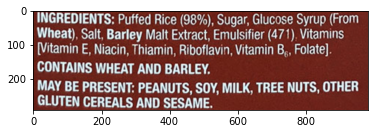

In [42]:
image = cv2.imread('2.png')
imshow(image)

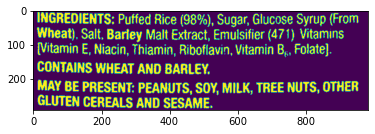

In [44]:
image = cv2.imread('2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh_img = thresh.copy()

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(thresh_img)

In [55]:
originaltext2 = "INGREDIENTS: Puffed Rice (98%), Sugar, Glucose syrup (From Wheat), Salt, Barley Malt Extract, Emulsifier (471) Vitamins[Vitamin E, Niacin, Thiamin, Riboflavin, Vitamin B, Floate]. CONTAINS WHEAT AND BARLEY. MAY BE PRESENT: PEANUTS, SOY, MILK, TREE NUTS, OTHER GLUTEN CEREALS AND SESAME."
originaltext2

'INGREDIENTS: Puffed Rice (98%), Sugar, Glucose syrup (From Wheat), Salt, Barley Malt Extract, Emulsifier (471) Vitamins[Vitamin E, Niacin, Thiamin, Riboflavin, Vitamin B, Floate]. CONTAINS WHEAT AND BARLEY. MAY BE PRESENT: PEANUTS, SOY, MILK, TREE NUTS, OTHER GLUTEN CEREALS AND SESAME.'

In [63]:
import pandas as pd
df = pd.DataFrame()
df['imageNo'] = ["13.png","2.png"]
df['predictedText'] = [text,text2]
df['originalText'] = [originaltext,originaltext2]
df['cer'] = ''
df['wer'] = ''
df.head()

,imageNo,predictedText,originalText,cer,wer
0,13.png,"INGREDIENTS: Putfed Rice (98%), Sugar, Glucose...","INGREDIENTS: Puffed Rice (98%), Sugar, Glucose...",,
1,2.png,"INGREDIENTS: Putfed Rice (98%), Sugar, Glucose...","INGREDIENTS: Puffed Rice (98%), Sugar, Glucose...",,


In [ ]:
# import fastwer
# for index, row in df.iterrows():
#     filename = row['imageNo']
#     ref = row['originalText']
#     output = row['predictedText']
#     cer = fastwer.score_sent(output, ref, char_level=True)
#     wer = fastwer.score_sent(output, ref, char_level=False)
#     df.loc[df['imageNo'] == filename, 'cer'] = round(cer,2) # Round value to 2 decimal places
#     df.loc[df['imageNo'] == filename, 'wer'] = round(wer,2)

# df

In [45]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [46]:
def cleantext(text):
	text= re.sub('[*|\n|\|(|)|.]',' ',text)
	text = re.sub('[}|{|\|/|,|:]',' ',text)
	text = re.sub(' +',' ',text)
	ingredients = text.split()  
	return ingredients 

In [47]:
def checksafe(ingredients,wheat):
    for i in range(len(wheat)):
    		 for j in range(len(ingredients)):
        		if similar(wheat[i],ingredients[j]) >= 0.7:
            		    print ("NOT SAFE CONTAINS ALLERGIC INGREDIENTS")
            		    #print (similar(wheat[i],ingredients[j]))
            		    return 0

    return 1  

In [48]:
def gettext(image):
	img = cv2.imread(image,0)
	kernel = np.ones((1,1),np.uint8)
	th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
	big = cv2.resize(th,(0,0),fx=2,fy=2)
	cv2.imwrite("ing.jpg",big)
	text = pytesseract.image_to_string(Image.open(os.path.abspath("ing.jpg")))
	return text

In [60]:
wheat = ['bulgur', 'cereal', 'couscous', 'cracker', 'einkorn', 'flour', 'gluten', 'malt', 
'semolina', 'triticale', 'triticum', 'bran', 'gem', 'wheat','dextrin', 'maltodextrin', 
'monosodium glutamate', 'oats', 'soy']

text2 = gettext("2.png")

In [61]:
text2

'INGREDIENTS: Putfed Rice (98%), Sugar, Glucose Syrup (From\nWheat), Salt, Barley Malt Extract, Emulsifier (471). Vitamins 5%\n[Vitamin E, Niacin, Thiamin, Riboflavin, Vitamin 7 Folate. a\nCONTAINS WHEAT AND BARLEY. Gea Lanta\nMAY BE PRESENT: PEANUTS, SOY, mK TREE NUTS, OTHER\n\n  \n\x0c'

In [57]:
# print(ingredientslist)
#.encode("utf-8")
ingredientslist = cleantext(text)
print (len(ingredientslist))
ingredientslist = [x.lower() for x in ingredientslist]
x=0
for i in range(len(wheat)):
    for j in range(len(ingredientslist)):
#     	print (similar(wheat[i],ingredientslist[j]))
        if (similar(wheat[i],ingredientslist[j]) >= 0.8):
            x=x+1
            print(wheat[i])
# checksafe(ingredientslist,wheat)
if x>0:
	print("NOT SAFE CONTAINS POSSIBLE ALLERGIC INGREDIENTS")
else:
      print("IT IS SAFE DOESN'T CONTAIN ALLERGIC INGREDIENTS")
#print(x)

NameError: name 'ingredientslist' is not defined

In [51]:
print(ingredientslist)

NameError: name 'ingredientslist' is not defined